# Project 2: Helping realtors to predict sale prices in Ames 

Done by: Richelle-Joy Chia, data scientist and realtor at MyProperty

Problem statement: How can we help realtors effectively and efficiently predict the market value of houses in Ames, Iowa?

## Outline:
    
- Part 1: Introduction and Exploratory Data Analysis 
- Part 2: Data Cleaning
- Part 3: Preprocessing and Feature Engineering
- Part 4: Modeling and Insights

## Part 1: Introduction and Exploratory Data Analysis

## Introduction

All around the world, it is clear that house prices vary to a great extent. Sometimes, we do see that house prices differ even within the same area. How do we decide how much to sell or buy a property for? One common approach would be to ask a realtor to come up with a price. It sounds straightforward to put a price tag on the house, however, there is much more to it. As such, my team decided to conduct a survey among fellow colleagues to ask them about their experience with house prices. In general, we realized that realtors are spending way too much time trying to come up with a satisfactory number for their buyers/sellers. Moreover, they have to sieve through and consider various features.

My problem statement wouold then be how can we help fellow realtors effectively and efficiently predict the market value of houses in Ames, Iowa? 

As a data scientist and realtor at MyProperty, I have decided to use existing data to build an accurate model to predict sale prices. Put simply, realtors would be able to input the house features into the model and the ideal price would appear. For this project, I included a dataset that contains several variables, which can potentially be included in the model. For example, quality and quantity of physical attributes of residential homes sold between 2006-2010. Most of the variables contain information a typical home buyer would like to know about a property (e.g., square footage, number of bedrooms and bathrooms, size of lot). This link contains a description of the variables used in this dataset - http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

## Exploratory Data Analysis

Before analysing the datasets, it is important to do some data cleaning to identify and fix errors, duplicates, and irrelevant data from a raw database.

### Import relevant libraries and datasets

In [1]:
# import relevant libraries 

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(style="white", color_codes=True)
colors_palette = sns.color_palette("GnBu_d")
sns.set_palette(colors_palette)


In [2]:
# import datasets

train_data = pd.read_csv('./datasets/train.csv')
test_data = pd.read_csv('./datasets/test.csv')

### Data Exploration

In [3]:
# explore the test dataset

test_data.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [4]:
# check if there are any negatives in the predictor (y)
train_data['SalePrice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

#### Sale price distribution

/Users/richelle-joychia/mambaforge/envs/dsi-sg/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


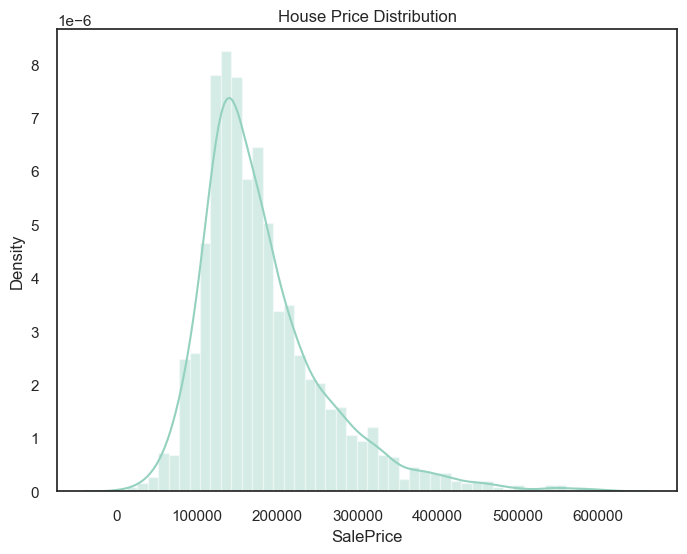

In [5]:
# check for sale price distribution 

plt.figure(figsize=(8,6))
sns.distplot(train_data.SalePrice)
title = plt.title("House Price Distribution")

#### Variables that are correlated with house price

In [6]:
# top 10 variables that are correlated with SalePrice 

corr_saleprice = train_data.corr().SalePrice.sort_values(ascending=False)
corr_saleprice.head(10)

SalePrice         1.000000
Overall Qual      0.800207
Gr Liv Area       0.697038
Garage Area       0.650270
Garage Cars       0.648220
Total Bsmt SF     0.628925
1st Flr SF        0.618486
Year Built        0.571849
Year Remod/Add    0.550370
Full Bath         0.537969
Name: SalePrice, dtype: float64

#### a) House price and overall quality

Based on the boxplot, we can see that as overall quality increases, house price increases as well.

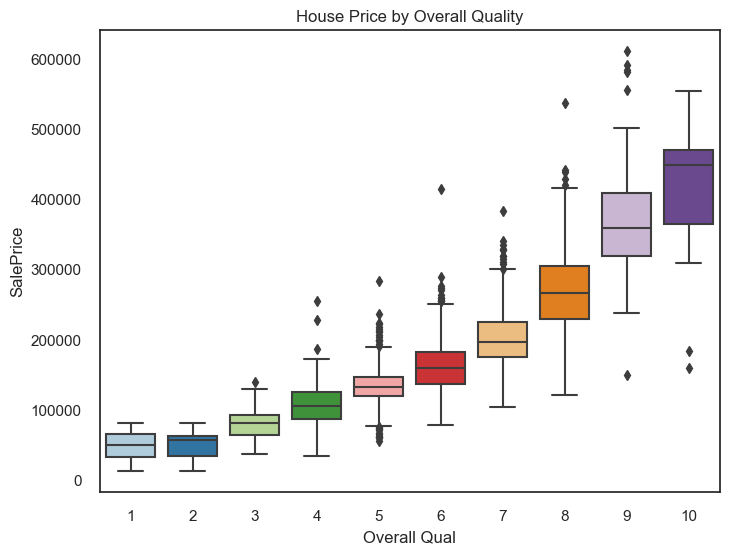

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Overall Qual', y='SalePrice', data=train_data, palette='Paired')
title = plt.title('House Price by Overall Quality')

#### b) House price and above grade (ground) living area 

Based on the scatterplot, we can see that house price is higher when there is more living area. However, it seems like there are some outliers to take note of. 

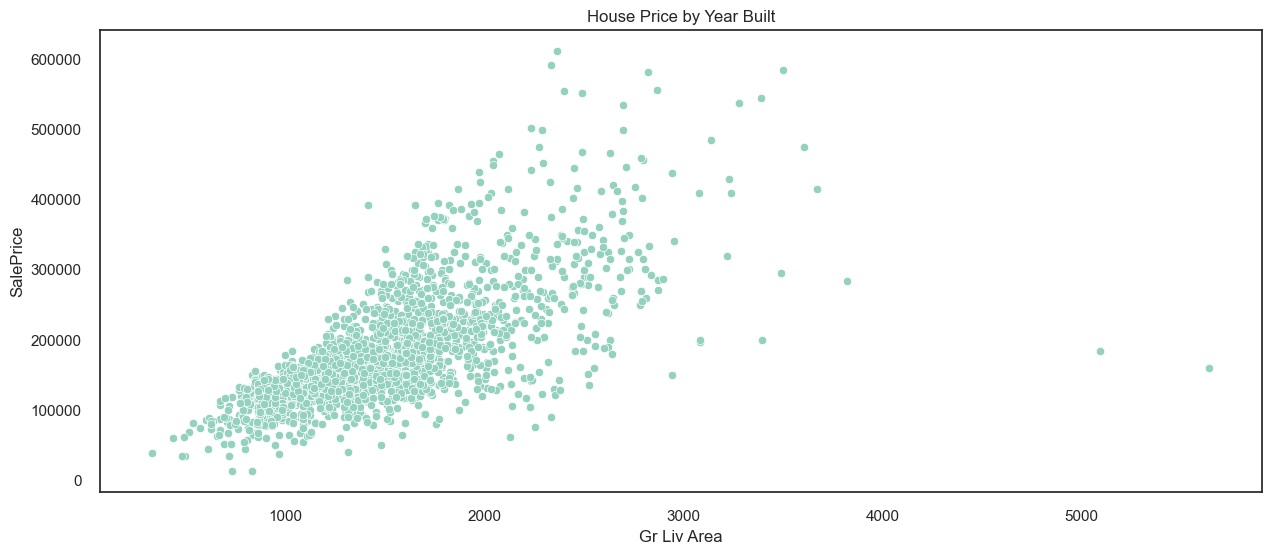

In [8]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=train_data)
title = plt.title('House Price by Year Built')

#### c) House price and garage area 

Based on the scatterplot, we can also see that house price increases when there is more garage area. However, it seems like there are also outliers to take note of.

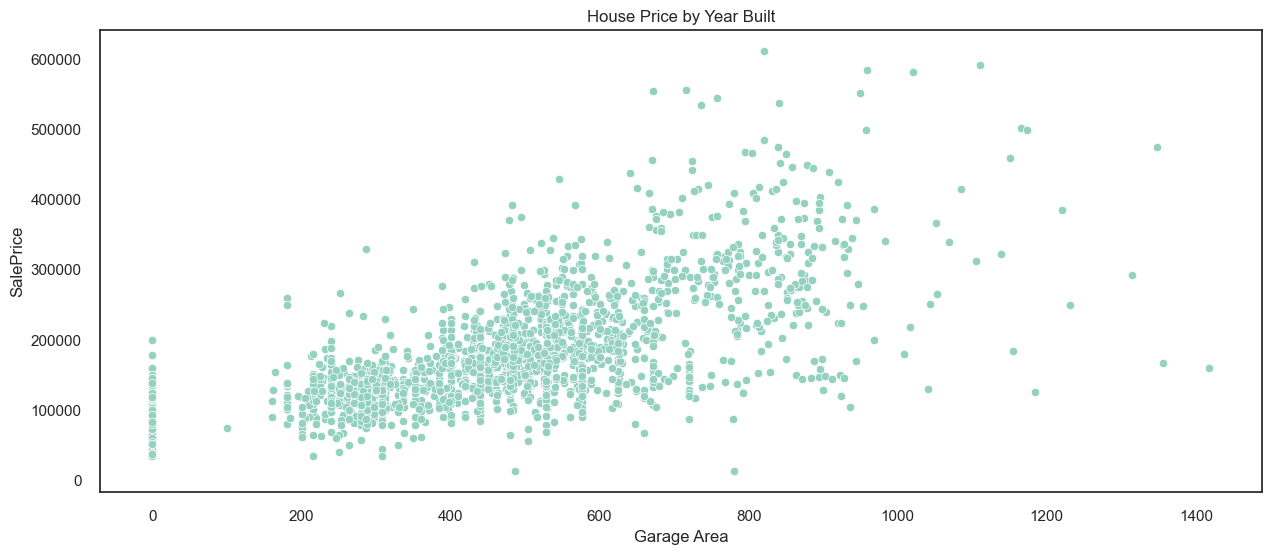

In [9]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Garage Area', y='SalePrice', data=train_data)
title = plt.title('House Price by Year Built')

### Let's take a look at some categorical variables: 


#### Sale price and neighborhood

There is a huge dispartity in house prices, depending on which neighborhood you live in. The most expensive neighborhoods are StoneBr, NridgHt, and NoRidg, while the cheapest neighborhoods are ...

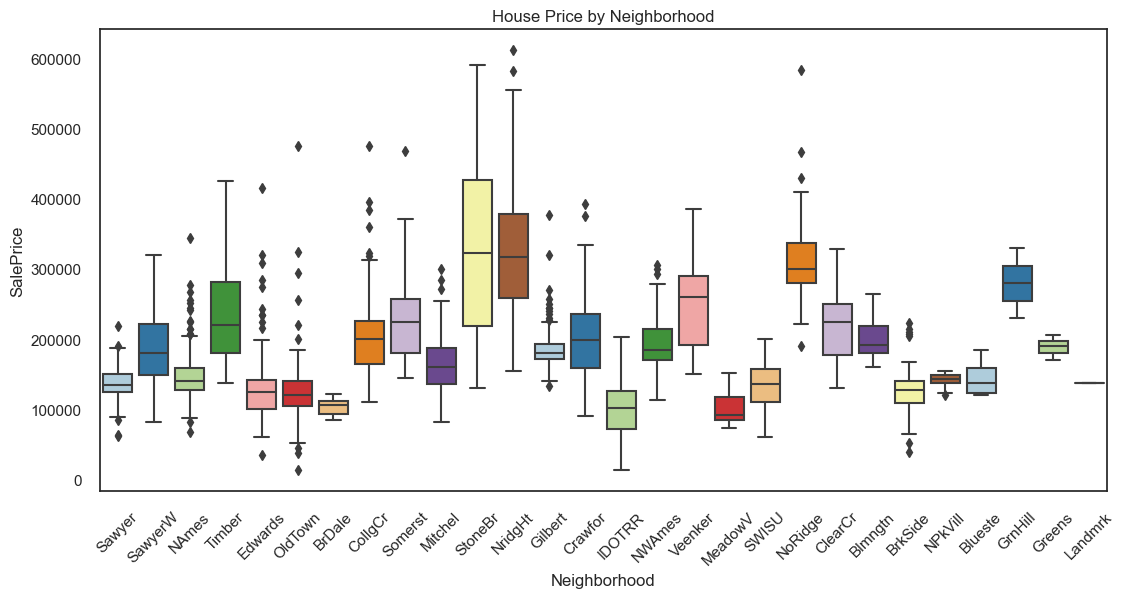

In [10]:
plt.figure(figsize=(13, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=train_data, palette='Paired')
title = plt.title('House Price by Neighborhood')
tick = plt.xticks(rotation=45)

#### Sale price and kitchen quality

Ktichen quality does play a role in elevating house prices.

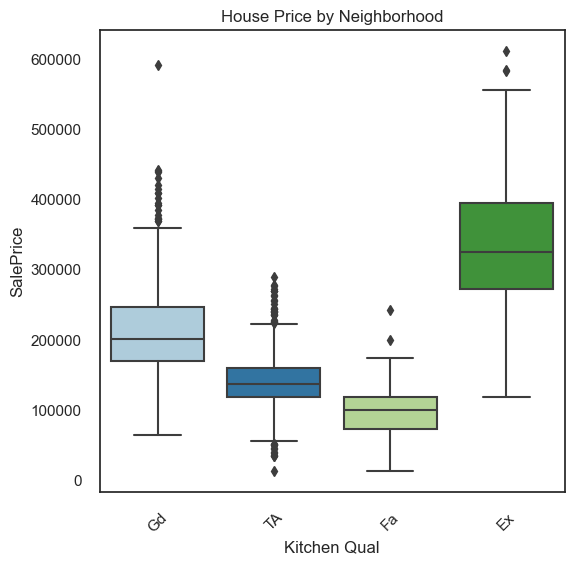

In [11]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='Kitchen Qual', y='SalePrice', data=train_data, palette='Paired')
title = plt.title('House Price by Neighborhood')
tick = plt.xticks(rotation=45)

#### Sale price and exterior quality

Similarly, exterior quality seems to play a role in housing prices.

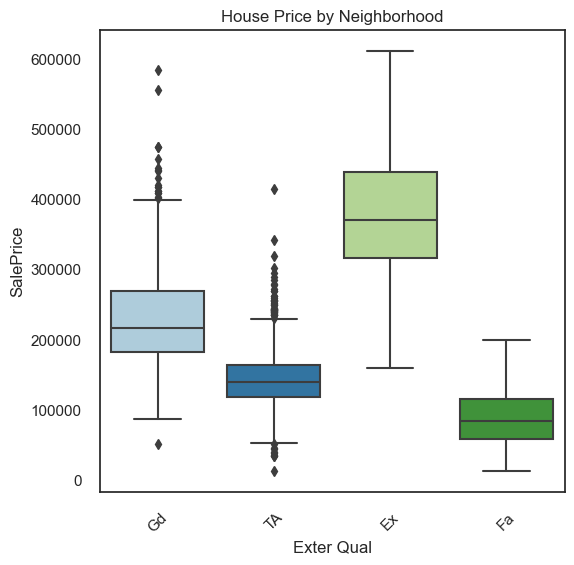

In [12]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='Exter Qual', y='SalePrice', data=train_data, palette='Paired')
title = plt.title('House Price by Neighborhood')
tick = plt.xticks(rotation=45)

### Correlation matrix (I) to examine the relationship between the variables and predictor (SalePrice)

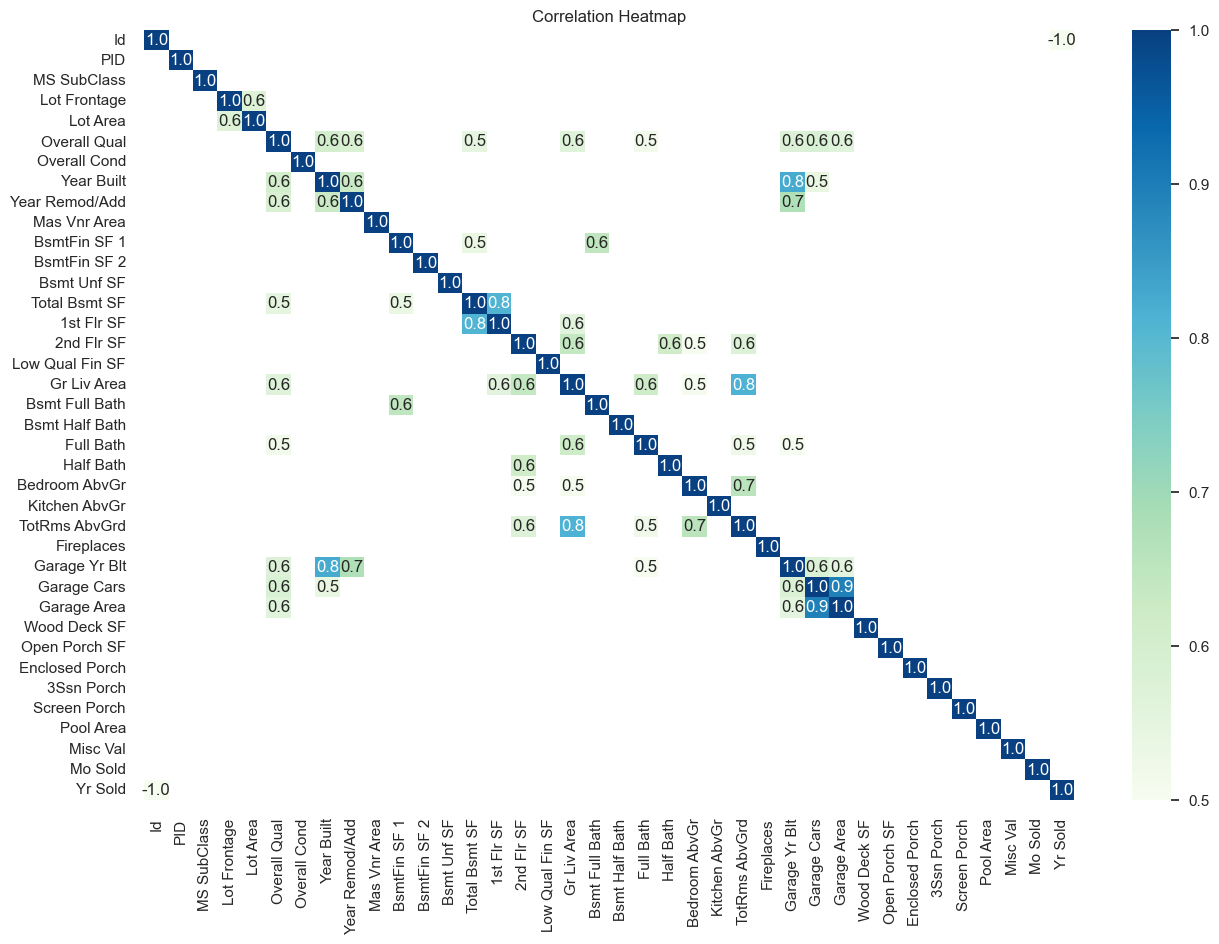

In [13]:
# correlation matrix excluding SalePrice 
corr_matrix = train_data.iloc[:, :-1].corr()

# Select correlations greater than 0.5
high_corr_matrix = corr_matrix[abs(corr_matrix) >= 0.5]

# Plot correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(high_corr_matrix,
            annot=True,
            fmt='.1f',
            cmap='GnBu',
            vmin=0.5,
            vmax=1)
title = plt.title('Correlation Heatmap')

According to the heatmap, there is a few multicollinearity (>0.7) among variables in the training dataset.
1. Garage Yr Blt and Year Built (0.8)
2. Garage Cars and Garage Area (0.9)
3. 1st Flr SF and TotalBsmtSF (0.8)
4. Gr Liv Area and TotRms AbvGrd (0.8)

As such, among the pairs, I will be removing features that have a lower correlation with Sale Price (refer to Part 2: Data Cleaning; Garage Yr Blt, garage cars, 1st Flr Sf , and TotRms AbvGrd will be removed). 

In [14]:
# examine each pair with the predictor

print(train_data['Garage Yr Blt'].corr(train_data['SalePrice']))
print(train_data['Year Built'].corr(train_data['SalePrice']))
#to remove 

print(train_data['Garage Cars'].corr(train_data['SalePrice']))
print(train_data['Garage Area'].corr(train_data['SalePrice']))
#to remove  

print(train_data['1st Flr SF'].corr(train_data['SalePrice']))
print(train_data['Total Bsmt SF'].corr(train_data['SalePrice']))
#to remove 

print(train_data['Gr Liv Area'].corr(train_data['SalePrice']))
print(train_data['TotRms AbvGrd'].corr(train_data['SalePrice']))

0.5339218965313843
0.5718488959135765
0.6482202649455956
0.6502700352166241
0.6184861410533949
0.6289247057344555
0.6970384443056633
0.5040143180735326


### Check for Missing Values

In [15]:
# check for missing values in non-numeric columns

def check_na_cols(df):
    check_na_cols = df.select_dtypes([np.object]).columns
    for col in check_na_cols:
#        print("Values of {} are {}.".format(col,df[col].unique()))
        n_nan = df[col].isnull().sum()
        if n_nan > 0:
            print("{} has {} NaNs".format(col,n_nan))
    return

In [16]:
# function to check for NaN values in numeric columns 

def check_null(df):
    s = df.shape
    print("Rows: {} Cols: {}".format(s[0],s[1]))

    # Check for null values
    null_data = df.isnull().sum()
    null_data_count = sum(df.isnull().sum())
    if  null_data_count > 0:
        print("There are {} null data.".format(null_data_count))
        print("Columns with NaN: {}".format(list(null_data[null_data > 0].index)))
        
    check_na_cols(df)

    return

In [17]:
print("Training data:")
check_null(train_data)
print("")

print("Test data:")
check_null(test_data)
print("")

Training data:
Rows: 2051 Cols: 81
There are 9822 null data.
Columns with NaN: ['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature']
Alley has 1911 NaNs
Mas Vnr Type has 22 NaNs
Bsmt Qual has 55 NaNs
Bsmt Cond has 55 NaNs
Bsmt Exposure has 58 NaNs
BsmtFin Type 1 has 55 NaNs
BsmtFin Type 2 has 56 NaNs
Fireplace Qu has 1000 NaNs
Garage Type has 113 NaNs
Garage Finish has 114 NaNs
Garage Qual has 114 NaNs
Garage Cond has 114 NaNs
Pool QC has 2042 NaNs
Fence has 1651 NaNs
Misc Feature has 1986 NaNs

Test data:
Rows: 878 Cols: 80
There are 4171 null data.
Columns with NaN: ['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual', 'Bsmt Cond

/var/folders/_h/y5c9n2xs6qj32b1f_mr0b0ch0000gn/T/ipykernel_13973/1106392629.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  check_na_cols = df.select_dtypes([np.object]).columns


In [18]:
# descriptives
train_data.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [19]:
# descriptives
test_data.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
count,878.000000,8.780000e+02,878.000000,718.000000,878.000000,878.000000,878.000000,878.000000,878.000000,877.000000,...,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,1444.749431,7.162867e+08,58.268793,69.545961,10307.033030,6.050114,5.566059,1970.492027,1984.417995,106.236032,...,470.362187,93.430524,47.070615,24.064920,2.597950,14.830296,1.884966,48.498861,6.202733,2007.825740
std,850.838263,1.889103e+08,42.235407,23.533945,10002.674602,1.369065,1.128903,30.395895,20.450725,187.158908,...,212.734075,121.181702,68.180939,73.249463,24.962482,53.003794,29.916672,550.169317,2.642498,1.327861
min,2.000000,5.263021e+08,20.000000,21.000000,1477.000000,2.000000,1.000000,1880.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,692.250000,5.284841e+08,20.000000,59.000000,7297.250000,5.000000,5.000000,1954.000000,1967.000000,0.000000,...,322.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,1433.000000,5.354542e+08,50.000000,68.000000,9446.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,...,473.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2197.500000,9.071904e+08,70.000000,80.000000,11589.000000,7.000000,6.000000,1999.750000,2003.000000,172.000000,...,576.000000,170.750000,69.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2928.000000,1.007100e+09,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,...,1488.000000,690.000000,742.000000,1012.000000,360.000000,576.000000,555.000000,15500.000000,12.000000,2010.000000


### That's all for EDA! Time for the the 2nd notebook where I work on cleaning the data.